In [25]:
import torch.nn as nn
import torch.nn.functional as F
import torch

## 1. Simple feedforward network 

To remind yourself, create a simple feedforward network, with input dim 10, with a single hidden layer of dim 20, and output a number. Do a single forward pass with a random dataset, create a random target, comput the MSE loss and do a backward pass

In [26]:
lin = nn.Linear(10,20)

In [27]:
torch.tensor(10*[1.])

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [28]:
t = torch.randn(10); t

tensor([ 1.8217,  0.2695, -0.3476, -1.8505, -0.1004,  0.1248,  1.6560, -0.4991,
         0.2190, -0.4017])

In [29]:
lin(t)

tensor([ 0.8732, -0.1332, -0.4331,  0.5943,  0.4708, -0.0870,  0.4531, -0.4693,
         0.1540,  0.0952, -0.4058,  0.3691, -0.6492,  0.1654, -0.0851, -0.5821,
        -0.4245,  0.0443,  0.7167,  0.3904], grad_fn=<ViewBackward0>)

In [30]:
F.relu(t), nn.ReLU()(t)

(tensor([1.8217, 0.2695, 0.0000, 0.0000, 0.0000, 0.1248, 1.6560, 0.0000, 0.2190,
         0.0000]),
 tensor([1.8217, 0.2695, 0.0000, 0.0000, 0.0000, 0.1248, 1.6560, 0.0000, 0.2190,
         0.0000]))

In [31]:
class FFN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = torch.nn.Linear(10,20)
        self.l2 = torch.nn.Linear(20,1)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        return x

In [32]:
m = FFN()

In [33]:
m(t)

tensor([0.4056], grad_fn=<ViewBackward0>)

In [34]:
X = torch.randn(64,10); X

tensor([[ 1.0870e+00,  1.2263e+00, -7.8523e-01, -8.3940e-01, -6.7724e-01,
          9.2860e-01,  3.0343e-01,  7.9721e-02, -1.4086e+00, -2.7782e-01],
        [ 1.5582e-01,  9.3273e-01, -2.1816e-01, -1.3889e+00, -1.4777e+00,
          7.0083e-01,  5.8816e-01,  4.6444e-02, -5.6448e-01,  2.1411e-01],
        [-4.6121e-01, -2.2032e+00, -1.9828e+00,  1.2385e+00, -1.0190e+00,
          2.0372e-01,  3.0791e+00,  8.9007e-01, -1.8027e+00, -1.2128e+00],
        [-1.0133e-01, -4.2590e-01,  5.4851e-01,  6.6805e-01,  1.5066e+00,
         -5.5172e-02,  6.6293e-01, -4.6370e-01, -3.6926e-01,  2.1173e-01],
        [-1.1335e-01, -1.0208e+00,  4.8580e-01, -1.0713e+00,  2.4005e+00,
         -7.3118e-01,  6.4561e-01,  8.9244e-01,  5.4515e-01,  6.2765e-01],
        [-9.7842e-01,  1.0640e+00, -1.8485e+00,  1.0954e-01,  6.3075e-01,
         -8.3446e-01,  8.2768e-01,  1.1316e+00,  2.0106e-01,  1.2592e+00],
        [ 5.3925e-01,  1.0378e+00,  3.8581e-01, -6.2374e-01,  7.2681e-01,
          1.9951e+00, -7.8996e-0

In [35]:
y = torch.randn(64, 1); y

tensor([[-0.1728],
        [-0.1590],
        [ 0.6183],
        [-0.3038],
        [ 2.1696],
        [-0.2361],
        [ 1.0324],
        [ 0.7959],
        [-0.7863],
        [ 0.0536],
        [-1.6242],
        [ 2.4896],
        [-0.1060],
        [ 2.0210],
        [ 1.8597],
        [ 0.5439],
        [-0.4174],
        [-1.0071],
        [ 0.6719],
        [-0.1610],
        [-1.2476],
        [-0.6378],
        [ 1.4842],
        [ 0.3149],
        [-0.1493],
        [-0.3425],
        [-0.6604],
        [ 0.2886],
        [ 1.3355],
        [ 0.8139],
        [-0.7668],
        [-0.5455],
        [-0.4572],
        [ 0.5443],
        [-0.5314],
        [-0.1220],
        [ 0.6118],
        [ 0.2320],
        [ 1.2634],
        [ 0.1388],
        [-1.0106],
        [-1.1894],
        [ 0.6897],
        [ 0.2198],
        [-0.6971],
        [-1.5483],
        [ 0.4862],
        [ 0.4120],
        [ 0.5808],
        [-0.5587],
        [ 0.5278],
        [ 1.3721],
        [ 0.

In [36]:
y_ = m(X); y_

tensor([[ 0.2638],
        [ 0.2957],
        [-0.0634],
        [-0.0646],
        [ 0.3828],
        [ 0.4899],
        [ 0.0865],
        [ 0.2469],
        [ 0.5994],
        [ 0.2061],
        [ 0.3522],
        [-0.2214],
        [ 0.1485],
        [ 0.4040],
        [ 0.4061],
        [ 0.1282],
        [ 0.3579],
        [-0.1419],
        [ 0.4043],
        [ 0.3060],
        [-0.2939],
        [ 0.0130],
        [-0.2531],
        [ 0.0631],
        [-0.1042],
        [ 0.3036],
        [-0.0812],
        [ 0.4360],
        [-0.0559],
        [-0.3699],
        [ 0.6912],
        [ 0.1719],
        [ 0.3576],
        [ 0.5107],
        [ 0.2206],
        [ 0.3517],
        [ 0.2696],
        [ 0.0723],
        [ 0.3818],
        [-0.1451],
        [ 0.4905],
        [ 0.3574],
        [ 0.5384],
        [-0.0890],
        [-0.4068],
        [-0.3605],
        [ 0.1963],
        [ 0.2382],
        [-0.0464],
        [-0.0732],
        [ 0.5822],
        [ 0.3946],
        [ 0.

In [37]:
loss = torch.sum((y_ - y)**2) / y.shape[0]
loss

tensor(1.0310, grad_fn=<DivBackward0>)

In [38]:
loss.backward()

In [39]:
loss

tensor(1.0310, grad_fn=<DivBackward0>)

In [40]:
for w in m.parameters():
    w_ = w - 0.001 * w.grad
    print(w, w_)
    break

Parameter containing:
tensor([[ 0.1971, -0.0972, -0.1363, -0.2395, -0.0043,  0.0695,  0.0850, -0.2161,
         -0.2564,  0.1548],
        [ 0.1591,  0.2335, -0.1132, -0.3147,  0.3136,  0.0034, -0.1293,  0.1022,
         -0.0886,  0.0378],
        [-0.2514, -0.1904,  0.1708, -0.0264, -0.1660, -0.1663,  0.2827, -0.0765,
          0.2024,  0.2449],
        [ 0.1953, -0.1348,  0.2417,  0.2698,  0.1857,  0.2712,  0.2677, -0.1584,
          0.0890, -0.2183],
        [-0.2252,  0.1704, -0.0264, -0.2910, -0.0483,  0.1411,  0.2381,  0.1963,
         -0.1707,  0.2785],
        [-0.0587, -0.2193, -0.1140, -0.1335, -0.1422, -0.1167,  0.2281,  0.0752,
         -0.1477, -0.1583],
        [ 0.2799, -0.0395, -0.2998,  0.2842,  0.1344,  0.0472,  0.1087,  0.3093,
         -0.0627, -0.2529],
        [ 0.0991, -0.0803, -0.1969,  0.2497,  0.1157,  0.1114, -0.2375, -0.0229,
         -0.1529,  0.0323],
        [-0.1183, -0.2598,  0.2463, -0.0905,  0.1235, -0.0152,  0.0374, -0.1464,
          0.2132,  0.1766

## 2. Train a binary classifier in 2D plane

Create two clusters with distinct labels, then train a classifier to predict the labels 



In [41]:
# midpoint of cluster 1 
m1 = torch.tensor([2,2])
m2 = torch.tensor([-2,-2])
m1, m2

(tensor([2, 2]), tensor([-2, -2]))

In [76]:
c1 = m1 + 1.2*(torch.randn(100, 2))
c2 = m2 + 1.2*(torch.randn(100, 2))

In [77]:
import matplotlib.pyplot as plt, numpy as np

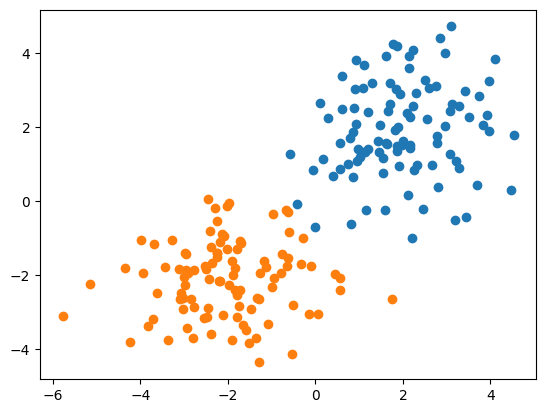

In [86]:
plt.scatter(c1.detach().numpy()[:,0], c1.detach().numpy()[:,1])
plt.scatter(c2.detach().numpy()[:,0], c2.detach().numpy()[:,1]);